<a href="https://colab.research.google.com/github/2303a510B1/14_PDS_10B1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset saved as /content/mti-07-00052-with-cover.pdf

--- Summary Before vs After Intervention ---
       Daily_ScreenTime_hrs_Before  Daily_ScreenTime_hrs_After  \
count                   200.000000                   200.00000   
mean                      3.976000                     2.59800   
std                       1.318109                     0.86553   
min                      -0.000000                    -0.00000   
25%                       3.100000                     2.00000   
50%                       4.100000                     2.60000   
75%                       4.900000                     3.20000   
max                       7.800000                     5.10000   

       Sleep_Hours_Before  Sleep_Hours_After  Academic_Performance_Before  \
count          200.000000         200.000000                   200.000000   
mean             6.955000           7.977387                    63.050000   
std              1.031355           1.175803                    14.298593 

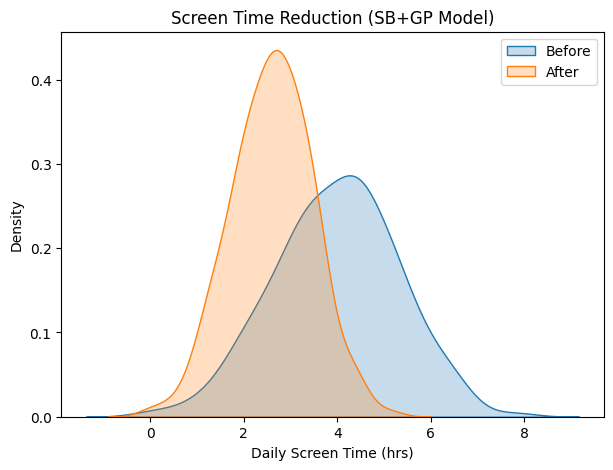

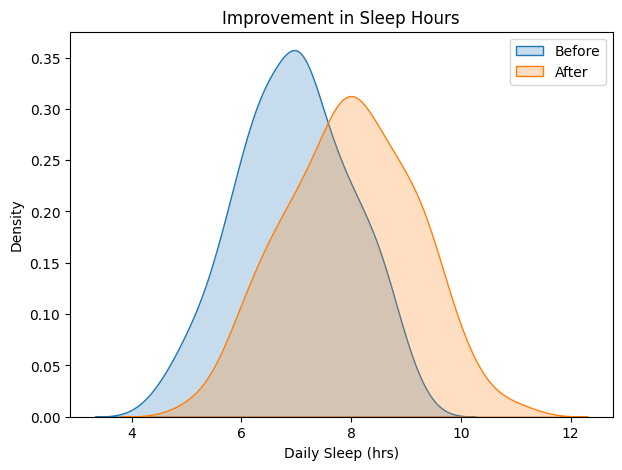

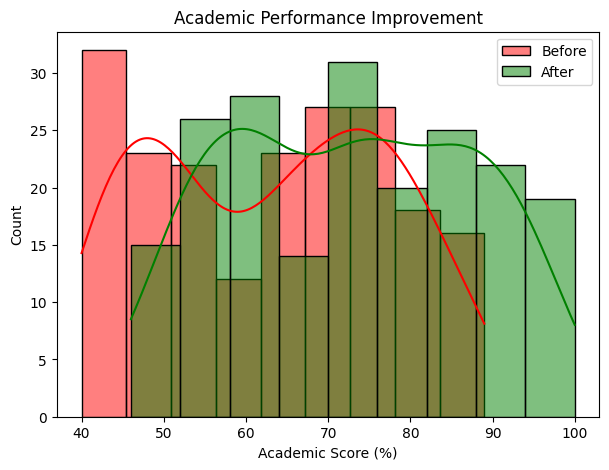

/tmp/ipython-input-3741419623.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Behavior_Score_Before", data=df, palette="Reds", alpha=0.7)
/tmp/ipython-input-3741419623.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Behavior_Score_After", data=df, palette="Greens", alpha=0.5)


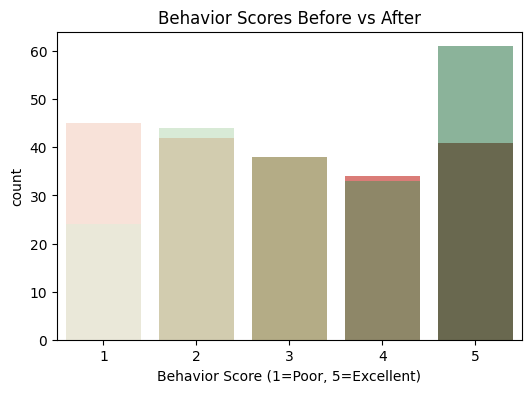

In [2]:
# Install libraries
!pip install pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Create Synthetic Dataset
# -----------------------------
np.random.seed(42)
n = 200  # number of children

data = {
    "Child_ID": range(1, n+1),
    "Age": np.random.randint(6, 16, size=n),  # school-aged kids
    "Daily_ScreenTime_hrs_Before": np.round(np.random.normal(4, 1.2, n), 1),  # before intervention
    "Sleep_Hours_Before": np.round(np.random.normal(7, 1, n), 1),
    "Academic_Performance_Before": np.random.randint(40, 90, size=n),
    "Behavior_Score_Before": np.random.randint(1, 6, size=n)  # 1=poor, 5=excellent
}

df = pd.DataFrame(data)

# -----------------------------
# 2. Simulate After Intervention (SB+GP Model)
# -----------------------------
# Screen time reduced by 30–40%
df["Daily_ScreenTime_hrs_After"] = np.round(df["Daily_ScreenTime_hrs_Before"] * np.random.uniform(0.6, 0.7, n), 1)

# Sleep improved by ~1 hour
df["Sleep_Hours_After"] = df["Sleep_Hours_Before"] + np.random.normal(1, 0.5, n)

# Academics improved slightly (due to better sleep + focus)
df["Academic_Performance_After"] = df["Academic_Performance_Before"] + np.random.randint(5, 15, size=n)

# Behavior improved
df["Behavior_Score_After"] = np.clip(df["Behavior_Score_Before"] + np.random.randint(0, 2, size=n), 1, 5)

# -----------------------------
# 3. Save Dataset
# -----------------------------
df.to_csv("/content/mti-07-00052-with-cover.pdf", index=False)
print("Dataset saved as /content/mti-07-00052-with-cover.pdf")

# -----------------------------
# 4. Analysis & Visualization
# -----------------------------
print("\n--- Summary Before vs After Intervention ---")
print(df[["Daily_ScreenTime_hrs_Before", "Daily_ScreenTime_hrs_After",
          "Sleep_Hours_Before", "Sleep_Hours_After",
          "Academic_Performance_Before", "Academic_Performance_After"]].describe())

# Screen Time Before vs After
plt.figure(figsize=(7,5))
sns.kdeplot(df["Daily_ScreenTime_hrs_Before"], label="Before", fill=True)
sns.kdeplot(df["Daily_ScreenTime_hrs_After"], label="After", fill=True)
plt.title("Screen Time Reduction (SB+GP Model)")
plt.xlabel("Daily Screen Time (hrs)")
plt.legend()
plt.show()

# Sleep Hours Before vs After
plt.figure(figsize=(7,5))
sns.kdeplot(df["Sleep_Hours_Before"], label="Before", fill=True)
sns.kdeplot(df["Sleep_Hours_After"], label="After", fill=True)
plt.title("Improvement in Sleep Hours")
plt.xlabel("Daily Sleep (hrs)")
plt.legend()
plt.show()

# Academic Performance Before vs After
plt.figure(figsize=(7,5))
sns.histplot(df["Academic_Performance_Before"], color="red", label="Before", kde=True)
sns.histplot(df["Academic_Performance_After"], color="green", label="After", kde=True)
plt.title("Academic Performance Improvement")
plt.xlabel("Academic Score (%)")
plt.legend()
plt.show()

# Behavior Score Before vs After
plt.figure(figsize=(6,4))
sns.countplot(x="Behavior_Score_Before", data=df, palette="Reds", alpha=0.7)
sns.countplot(x="Behavior_Score_After", data=df, palette="Greens", alpha=0.5)
plt.title("Behavior Scores Before vs After")
plt.xlabel("Behavior Score (1=Poor, 5=Excellent)")
plt.show()
